<a href="https://colab.research.google.com/github/satviki123/FML/blob/main/univarient_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

Loading the company Dataset


In [ ]:
company=pd.read_csv('/content/Company_data.csv')

In [ ]:
company.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
company.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
company.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
company.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


Based on the corelation values we find out the optimal features among the features

In [ ]:
company.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


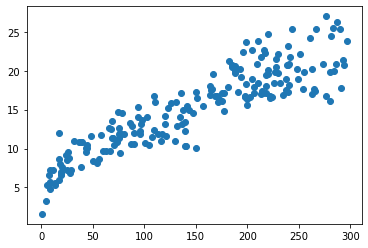

In [ ]:
plt.scatter(company['TV'],company['Sales'])

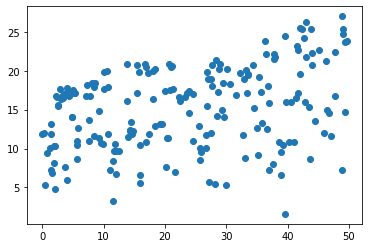

In [ ]:
plt.scatter(company['Radio'],company['Sales'])

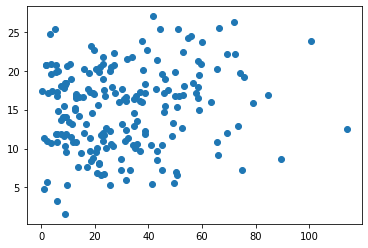

In [ ]:
plt.scatter(company['Newspaper'],company['Sales'])

In [ ]:
x=company.loc[:,'TV']
y=company.loc[:,'Sales']

In [ ]:
x


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [ ]:
type(x)
type(y)

pandas.core.series.Series

reshaping the dataset into one dimensional array

In [ ]:
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

reshaping the data into one dimensional array

splitting the training and testing data 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=35,train_size=0.70)

In [ ]:
x_train


array([[ 97.5],
       [240.1],
       [163.5],
       [170.2],
       [ 57.5],
       [202.5],
       [ 43. ],
       [232.1],
       [ 18.8],
       [109.8],
       [289.7],
       [296.4],
       [261.3],
       [ 68.4],
       [184.9],
       [234.5],
       [276.9],
       [ 76.4],
       [216.8],
       [228.3],
       [ 97.2],
       [182.6],
       [ 95.7],
       [ 78.2],
       [276.7],
       [116. ],
       [109.8],
       [123.1],
       [166.8],
       [217.7],
       [210.8],
       [ 16.9],
       [  5.4],
       [255.4],
       [ 18.7],
       [100.4],
       [206.8],
       [137.9],
       [293.6],
       [141.3],
       [ 28.6],
       [  4.1],
       [ 76.4],
       [199.1],
       [ 73.4],
       [ 62.3],
       [239.9],
       [135.2],
       [216.4],
       [248.4],
       [ 69. ],
       [ 48.3],
       [149.8],
       [290.7],
       [180.8],
       [ 90.4],
       [121. ],
       [199.8],
       [240.1],
       [ 74.7],
       [129.4],
       [171.3],
       [

In [ ]:
x_train.shape

(140, 1)

train the model

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=reg.predict(x_train)

find the performance on the test data

In [ ]:
print("MAE=",mean_absolute_error(y_train,y_train_pred))
print("MSE=",mean_squared_error(y_train,y_train_pred))
print("R2 score=",r2_score(y_train,y_train_pred))

MAE= 1.8773843448532914
MSE= 5.468522315169904
R2 score= 0.8123536934649148


scatter plot based on traning data

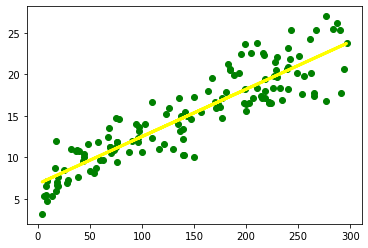

In [ ]:
plt.scatter(x_train,y_train,color="green")
plt.plot(x_train,reg.predict(x_train),color="yellow",linewidth=3)
plt.show()

scatter plot on the test data

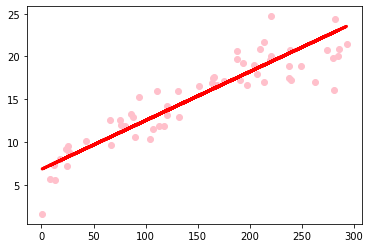

In [ ]:
plt.scatter(x_test,y_test,color="pink")
plt.plot(x_test,reg.predict(x_test),color="red",linewidth=3)
plt.show()